<a href="https://colab.research.google.com/github/hbhb0311/LikelionStudy/blob/main/1.DL_basic/3.Tensorflow_binaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이항 분류

## 이항 분류에 활성화함수 도입 이유

Q1. 이진판단을 쉽게 해결하기 위한 방법이 뭐가 있을까? 값 2개를 출력해서 비교해보면 되지 않을까?

A1. 앞서 우리가 배운 퍼셉트론의 선형 연산은 하나의 값만 출력해서 2개의 값 출력할 수가 없어

<br>


Q2. 그럼 임계치를 설정해서 선형 연산 결과가 이 값을 넘는지에 따라 하나의 값을 선택해 출력하면 되지 않을까?

A2. 그 방법은 미분이 불가능해 → 그럼 역전파 과정을 수행할 수 없어 파라미터(가중치, 편향) 갱신이 안되겠지? 

<br>

Q3. 그럼 신경망 연산 결과로 확률에 해당하는 값을 추정하고, 

이 값이 1에 가까우면 참, 0에 가까우면 거짓으로 선택하면 되지 않을까?

A3. 선형 연산 결과값 자체는 (-inf, inf) 라서  0~1 사이의 값으로 제한할 수가 없어

<br>

⇒ 결국! 

선형 연산에서는 범위의 제한이 없는 실숫값 계산 + 이후 `비선형 활성화 함수` 이용

비선형 활성화 함수로 실숫값을 0~1 사이의 값(확률값의 성질)을 갖도록 변환!

<br>

그렇다면 이진 판단에서는 비선형 활성화 함수 → 시그모이드 사용!

그렇다면 파라미터를 갱신할 손실함수는? → 교차 엔트로피 사용!

EX) 회귀분석에서는 MSE(평균제곱오차) 사용

## 시그모이드 함수 :  $\sigma(x)$

: 이진 판단에서 사용하는 활성화함수

### logit = log + odds

<br>

## Odds

: **성공확률이 실패확률에 비해 얼마나 더 큰지**를 설명

즉, odds가 클수록 성공확률이 크다는 것을 의미

In [21]:
from IPython.display import Image

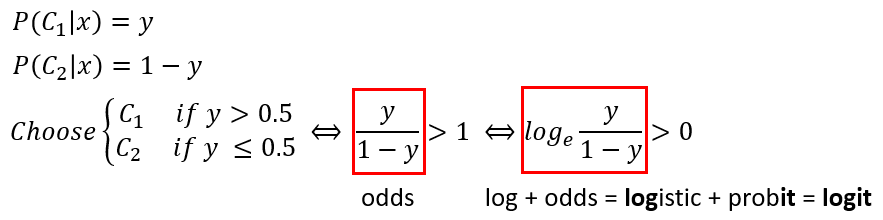

In [22]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled.png')

EX) 경마에서 특정 말이 이길 확률이 75%라고 한다면,

$ odds = \frac{0.75}{0.25} = 3$

→ 정수 표현을 이용한다면 3:1과 같이 표현가능, 즉 4게임 중에 3게임은 이기고 1게임은 진다는 의미

## Logit

logit의 장점 → 넓은 범위의 값을 간단하게 표현 가능, 변화량보다는 비율 관점에서 더 민감하게 포착 가능

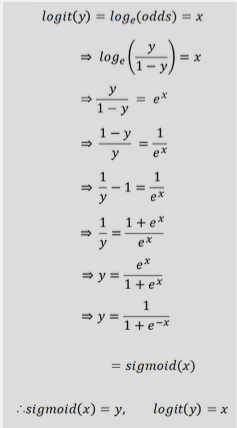

In [23]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled1.png')

→ 로짓함수와 시그모이드함수는 `역함수` 관계
<br>
[로짓과 시그모이드 개념에 대한 자세한 설명](https://chacha95.github.io/2019-04-04-logit/)

## 교차 엔트로피

: 이진 판단에서 사용하는 손실 함수

### 엔트로피

[[딥 러닝] 4강. 정보이론 기초, Entropy & Cross-entropy & KL-divergence](https://www.youtube.com/watch?v=z1k8HVU4Mxc)

단위 정보 수 ^ 정보량 = 표현 범위

즉, 전구 4개로 표현한다면 $2^4$ = 16 

→ $4 = log_2 16$ ⇒ 정보량 = log_단위 정보수 (표현범위)

<br>


$H(x)= \sum - p(x_i) log_2 p(x_i)$

→ 로그의 밑이 2인 경우 단위를 섀년 또는 비트라고 함 

<br>


$H(x)= \sum - p(x_i)logp(x_i)$

→ 밑이 자연상수인 경우는 내트라고 함

⇒ **정보 엔트로피**: 정보량의 평균(기댓값), 어떤 확률 분포로 일어나는 사건을 표현하는데 `필요한 정보량` 

따라서 값이 🔝 → 필요한 정보량 🔝 → 확률분포의 불확실성 🔝

<br>


$H(x)= \sum - p(x_i)log p(x_i)$ : 정보량의 가중평균

따라서,

$p(x_i)$ ⇒ 가중평균 계산에 사용되는 확률분포(하나의 정보량이 나올 확률?)

$− log p(x_i)$ ⇒ 정보량을 제공하는 확률분포( $p(x_i)$ 의 정보량)

## 교차 엔트로피

$H(P, Q)=−∑p(x_i)logq(x_i)$

<br>


$logp(x_i)$  ➡️   $logq(x_i)$ 로 바꾸어줌


$-logp(x_i)$ : 하나의 $p(x_i)$ 항에 대한 정보량

<br>


⇒  $-logq(x_i)$ [즉, **딥러닝이 예측한 정보량?**]으로 바꾸어주면, 

$-logq(xi)$ : 하나의 $q(x_i)$ 항에 대한 정보량 = 틀릴 수 있는 정보의 양

<br>


$H(x)=−∑p(x_i)logq(x_i)$ → **틀릴 수 있는 정보의 평균**

<br>


𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦(𝑃,𝑄) ≥ 𝐸𝑛𝑡𝑟𝑜𝑝𝑦(𝑃,𝑃 )

교차 엔트로피의 범위는 무한대까지 가능하지만, 학습이 진행되면서 `엔트로피 값에 수렴`하는 것을 목적

교차 엔트로피에 대한 설명 + 예시 :  [https://gnoej671.tistory.com/26](https://gnoej671.tistory.com/26)

엔트로피와 교차 엔트로피에 대한 자세한 설명 :  [http://melonicedlatte.com/machinelearning/2019/12/20/204900.html](http://melonicedlatte.com/machinelearning/2019/12/20/204900.html)

추후에 참고할 사이트 (로짓, 시그모이드, 소프트맥스) :

[https://opentutorials.org/module/3653/22995](https://opentutorials.org/module/3653/22995)

## 시그모이드 & 교차 엔트로피

이진 판단 문제에 대한 정답으로 $z$가 주어졌을 때, ($z$는 0 또는 1 가능)

데이터의 결과가 *참일 확률* :  $P_T =z$ 

데이터의 결과가 *거짓일 확률* : $P_F = 1-z$

<br>


---

<br>

**신경망 예측에 대한 확률값**은 (이진 판단 문제에서 활성화함수로 시그모이드 함수를 사용하니까?)

$Q_T =\sigma(x)$ ,  $Q_F = 1-\sigma(x)$

<br>

---

<br>

⇒ 교차 엔트로피 값 : 

$H(P, Q)=−∑p(x_i)logq(x_i)$ $= -zlog\sigma(x) -(1-z)log(1-\sigma(x))$

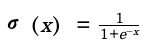

In [24]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled2.png')

위의 식을 대입하면

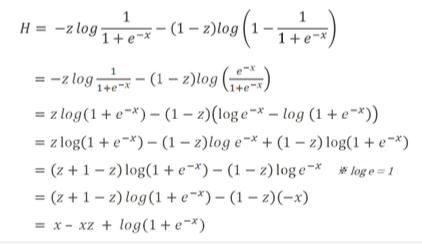

In [25]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled3.png')

→ 이진 판단에서는 z = 0 or z = 1

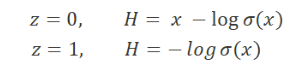

In [26]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled4.png')

→ H의 편미분

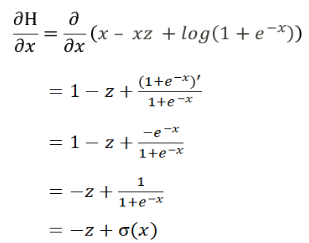

In [27]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled5.png')

[+) 시그모이드 미분](https://en.m.wikipedia.org/wiki/Logistic_function#Derivative)

## 오버플로우 문제 해결

#### 시그모이드

In [28]:
import numpy as np

def sigmoid(x):
  y = 1.0 / (1.0 + np.exp(-x))
  return y

print(sigmoid(-1000))
# 음수값 들어갔을 때 overflow 경고문 발생

0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


→  식 변경

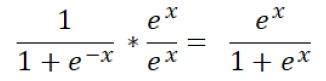

In [29]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled6.png')

In [30]:
def sigmoid(x):
  y = np.exp(x) / (1.0 + np.exp(x))
  return y

sigmoid(-1000)
# 출력값 -> 0.0 (정상적으로 나옴)

0.0

#### 교차엔트로피

In [31]:
def crossentropy(x):
  return np.log(1+np.exp(-x))

crossentropy(-1000)
# 출력값 -> inf(경고문 발생)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


inf

→ 식 변경

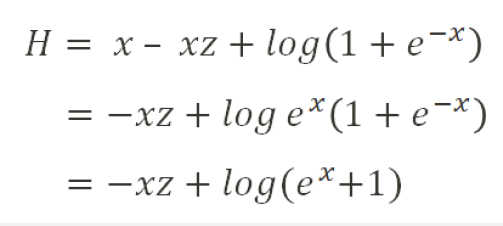

In [32]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled7.png')

In [33]:
def crossentropy(x):
  return -x + np.log(np.exp(x) + 1)

crossentropy(-1000)
# 출력값 : 1000.0(정상적으로 나옴)

1000.0

하지만, 이러한 식 변형은 x가 음수일때만 해줘야함. 양수일때는 본래의 식을 사용 

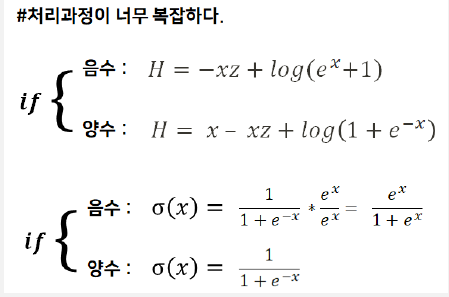

In [34]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled8.png')

→ 처리 과정이 복잡해 아래의 식으로 변경해줌 

⇒ max 함수와 절대값을 이용해 쉽게 적용할 수 있다.

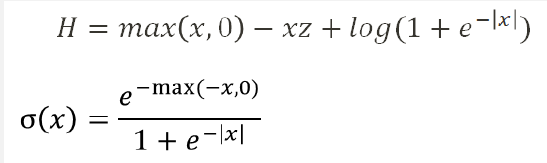

In [35]:
Image('/content/drive/MyDrive/멋쟁이사자처럼/dataset/binary/Untitled9.png')

## 와인 데이터

### 데이터 불러오기

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [37]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [38]:
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [39]:
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [40]:
# 각자의 데이터에 type 변수를 설정해 추가하기
red['type'] = 0
white['type'] = 1

In [41]:
# 데이터 합쳐주기 
wine = pd.concat([red, white])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### 시각화를 통해 데이터 확인

In [42]:
import matplotlib.pyplot as plt

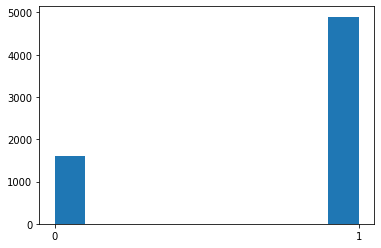

In [43]:
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

In [44]:
wine['type'].value_counts()
# white와 red의 비율이 3:1 정도인 것을 알 수 있음

1    4898
0    1599
Name: type, dtype: int64

### 데이터 정제

#### 데이터 정규화

In [45]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
# 정규화는 모든 값을 0과 1사이로 만들어 주는 것을 의미

wine_norm.head(2)
type(wine_norm)

pandas.core.frame.DataFrame

#### 섞고 array로 만들기

In [46]:
# 데이터를 섞어주고, array 로 만들어줌

wine_shuffle = wine_norm.sample(frac = 1)
# frac은 지정된 비율만큼 행을 랜덤하게 뽑아 새로운 데이터 프레임을 만들겠다는 뜻

import numpy as np
wine_np = np.array(wine_shuffle)
wine_np[:5]

array([[0.19834711, 0.11333333, 0.22891566, 0.11196319, 0.05980066,
        0.18402778, 0.46543779, 0.1659919 , 0.34883721, 0.13483146,
        0.15942029, 0.33333333, 1.        ],
       [0.23140496, 0.16666667, 0.14457831, 0.23696319, 0.05980066,
        0.10416667, 0.32488479, 0.21418932, 0.27906977, 0.16853933,
        0.17391304, 0.33333333, 1.        ],
       [0.21487603, 0.16666667, 0.18674699, 0.07515337, 0.06478405,
        0.14236111, 0.38479263, 0.15403894, 0.36434109, 0.24719101,
        0.1884058 , 0.5       , 1.        ],
       [0.32231405, 0.15333333, 0.13855422, 0.02147239, 0.09966777,
        0.09722222, 0.29493088, 0.12936187, 0.30232558, 0.2247191 ,
        0.26086957, 0.33333333, 1.        ],
       [0.25619835, 0.16      , 0.07831325, 0.11042945, 0.05481728,
        0.03472222, 0.25576037, 0.17139001, 0.39534884, 0.08426966,
        0.17391304, 0.33333333, 1.        ]])

#### train vs test

In [47]:
import tensorflow as tf

train_idx = int(len(wine_np) * 0.8)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx: , :-1], wine_np[train_idx: , -1]

In [48]:
train_X[0]

array([0.19834711, 0.11333333, 0.22891566, 0.11196319, 0.05980066,
       0.18402778, 0.46543779, 0.1659919 , 0.34883721, 0.13483146,
       0.15942029, 0.33333333])

In [49]:
test_X[0]

array([0.12396694, 0.23333333, 0.06626506, 0.00766871, 0.03322259,
       0.01736111, 0.10368664, 0.07036823, 0.6124031 , 0.14606742,
       0.46376812, 0.16666667])

In [50]:
train_Y[0]

1.0

In [51]:
test_Y[0]

1.0

#### one-hot encoding

In [52]:
# red=0, white=1 로 하면 white가 더 중요한 정보라고 인지할 수 있음
# 따라서 같은 형식으로 변경해줌
# num_classes는 정답 클래스의 개수 ; white, red 2개라서 2로 입력
train_Y = tf.keras.utils.to_categorical(train_Y, 2)
test_Y = tf.keras.utils.to_categorical(test_Y, 2)
train_Y[0] # 1을 뜻함 , white

array([0., 1.], dtype=float32)

In [53]:
test_Y[0] # 0을 뜻함, red

array([0., 1.], dtype=float32)

### 분류 모델 설정

In [54]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(48, 'relu'),
                             tf.keras.layers.Dense(24, 'relu'),
                             tf.keras.layers.Dense(12, 'relu'),
                             tf.keras.layers.Dense(2, 'softmax')
])
# 마지막 층의 뉴런의 개수는 2, 출력 값의 차원이 2차원이라서 ? [1,0] 이런 식으로...
# softmax : max함수의 좀 더 soft한 버전이라고 생각하면 됨, 두가지의 결과 값중 조금 더 확률 높은 값을 결정값으로 확정짓는 것

### 모델 학습시킬 준비

In [55]:
model.compile(tf.keras.optimizers.Adam(lr = 0.07), loss = 'categorical_crossentropy', metrics=['accuracy'])
# metrics 는 이 값도 같이 출력해달라는 의미 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [56]:
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 4s 6ms/step - loss: 0.1372 - accuracy: 0.9441 - val_loss: 0.0413 - val_accuracy: 0.9869
Epoch 2/25
122/122 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.9651 - val_loss: 0.0392 - val_accuracy: 0.9885
Epoch 3/25
122/122 [==============================] - 1s 5ms/step - loss: 0.0504 - accuracy: 0.9864 - val_loss: 0.0426 - val_accuracy: 0.9885
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9887 - val_loss: 0.0396 - val_accuracy: 0.9885
Epoch 5/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9874 - val_loss: 0.0655 - val_accuracy: 0.9777
Epoch 6/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0440 - accuracy: 0.9900 - val_loss: 0.0361 - val_accuracy: 0.9938
Epoch 7/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0307 - val_accuracy: 0.9938
Epoch 

In [57]:
model.summary()
# 이걸 쓰려면 fit을 하고 쓰든지, 처음 층을 설계할때 input_shape을 설정해줘야함

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


### loss, accuracy 시각화

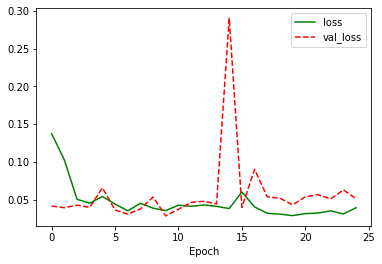

In [58]:
plt.plot(history.history['loss'], 'g-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

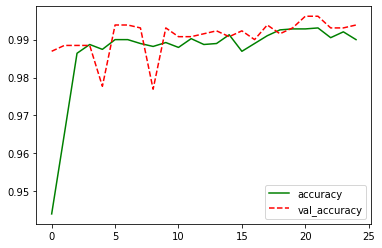

In [59]:
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
plt.legend()
plt.show()

### 분류모델 평가

In [60]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9892


[0.04453446343541145, 0.989230751991272]